## Imports

In [1]:

import distutils.version
from PreprocessUtils import ResampleCases,CreateDateBase
from main import *


Start Time-_04_06_2024_12_34


# Model Training and data preparation


## Date Preprocess

First time users, here's a guide to organizing your data effectively:

*Create a New Folder*:Open a new folder where you'll store your data.
*Case ID Consistency* : Make sure the Case ID is the same for both axial and coronal files, and it's at the beginning of the file name. This simplifies data management and retrieval.
*File Naming Convention* :Use a consistent naming convention for your files. For axial files, include "AXIAL", "Axial", "axial", or similar after the case_id of the file name. For coronal files, use "CORONAL", "Coronal", "coronal", or similar. This makes it easy to distinguish between the two types of files.

In [2]:
# Resample isotropicly nifti coronal files
path_to_data_files = "/tcmldrive/shared/RambamMRE082022/new2/"
coronal_files_prefix = None # not mandatory
ResampleCases(path_dir = path_to_data_files ,prefix = coronal_files_prefix)


NameError: name 'ResampleCases' is not defined

In [ ]:
# Creat DB file with isotropic, coronal and axial files paths
path_to_data_files = "/tcmldrive/shared/RambamMRE082022/new2/"
CreateDateBase(path_to_data_files,cor_prefix=None,ax_prefix=None,train_frac=0.8,test_frac=0.1,num_folds = 1)

## Paramaters Initializaion

In this section, you have the option to adjust the main parameters for both the framework and model training. You can explore additional parameters in the parameter_dictionary.txt file. The default parameters for training are already predefined.

In [ ]:


override_args = {
    "path_to_set":"/tcmldrive/shared/RambamMRE082022/new2/",
    "path_to_results":"/argusdata/users/jenny075/JennySh/results/",
    "amount_of_files":20,
    "batch_size":12,
    "gpu_device":"0,1",
    "title":"Test",
    "total_samples":100,
    "patch_size":48,
    "epochs": 2,
    "valid_batch_size": 40,
    "val_epoch": 2,
}

parser = setup_parser()
args, _ = parser.parse_known_args([])
vars(args).update(override_args)

## Dataset Creation

This function creates training, validation, and test datasets for model training. It also generates a new folder at the specified 'path_to_results' to save the results. Additionally, it sets up a writer for TensorBoard tracking.


In [ ]:
dl_train , dl_valid_lr,dl_valid_hr,dl_test_lr,dl_test_hr,result_dir,writer,config  = Data_Inittializaion(args)

## Train validation and test
This function first, initialize the model and set the model parameters. Then, trains the model using the dl_train dataset and validate it using dl_valid_lr and dl_valid_hr datasets. Once training is complete, it tests the model using dl_test_lr and dl_test_hr datasets.

In [ ]:
training_validation_test(dl_train , dl_valid_lr,dl_valid_hr,dl_test_lr,dl_test_hr,result_dir,writer,config)

# Reconstruct SR Volumes
In this section, you can apply the trained model to all the data in the folder. Ensure that the data is isotropically resampled before applying the model

## Framework Initializaion

In this section, you need to det the main parameters for both the framework . The default parameters for the framework are already predefined.

In [2]:
override_args_test = {
    "path_to_set":"/tcmldrive/shared/RambamMRE082022/new3/",
    "path_to_results":"/argusdata/users/jenny075/JennySh/results/",
    "path_to_trained_model":"/argusdata/users/jenny075/JennySh/DGX_results/RAMBAM_COR_FINAL_CHECKPOINTS/ESRT_RAMBAM_FINAL_CORONAL_CHEACKPOINTS_fold1__25_04_2024_18_41/Saved/check_points/1000.pth",
    "gpu_device":"0,1",
    "title":"Test_SR_REc",
    "save_nifti":True,
}

parser = setup_parser_test()
args_, _ = parser.parse_known_args([])
vars(args_).update(override_args_test)

## Reconstruction

This function applies the model to the isotropically resampled files and saves the super-resolution version of each file

In [3]:
reconstract_SR_volumes_in_folder(args_)

<module 'General_config' from '/argusdata/users/jenny075/JennySh/code_production/General_config.py'>
config.multi_gpu -  [0, 1]
config.use_multi_gpu True
gpu available: True
gpu count: 2
Creating the dataset
scale 0.16666666666666666
288
36
Starting SR reconstruction
Saving tensors for /tcmldrive/shared/RambamMRE082022/new3/1005360015317_20200710_cor_2D_FIESTA__isotropic.nii.gz file
/tcmldrive/shared/RambamMRE082022/new3/1005360015317_20200710_cor_2D_FIESTA__isotropic.nii.gz
Saving tensors for /tcmldrive/shared/RambamMRE082022/new3/1021823107385_20190111_cor_2D_FIESTA__isotropic.nii.gz file
/tcmldrive/shared/RambamMRE082022/new3/1021823107385_20190111_cor_2D_FIESTA__isotropic.nii.gz
Saving tensors for /tcmldrive/shared/RambamMRE082022/new3/1024089432272_20160113_cor_2D_FIESTA__isotropic.nii.gz file
/tcmldrive/shared/RambamMRE082022/new3/1024089432272_20160113_cor_2D_FIESTA__isotropic.nii.gz
Saving tensors for /tcmldrive/shared/RambamMRE082022/new3/1024089432272_20170503_cor_2D_FIESTA__

In [4]:
isotropic = load_nifti_image('/tcmldrive/shared/RambamMRE082022/new3/775884076332_20190823_cor_2D_FIESTA_.nii.gz','nifti')
plt.imshow(isotropic[250])
plt.show()

In [ ]:
a.shape

In [8]:
SR = load_nifti_image("/argusdata/users/jenny075/JennySh/results/Test_SR_REc_04_06_2024_12_34/775884076332_20190823_cor_2D_FIESTA__isotropic_SR_.nii.gz",'nifti')
plt.imshow(SR[250])
plt.show()

In [6]:
a.shape

torch.Size([512, 210, 512])

In [7]:
b.shape

torch.Size([509, 208, 512])

In [9]:
%matplotlib inline

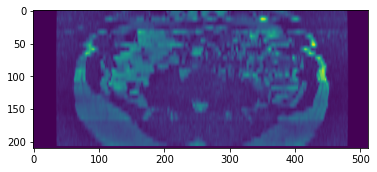

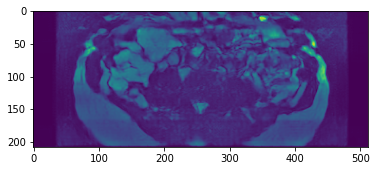